# 1. Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import copy
from scipy.stats import chisquare
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


df = pd.read_csv('/content/drive/MyDrive/Oeson Capstone/gni-olympics.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,iso,ioc,name,continent,population,gdp,olympics_index,sports_index,olympicsIndex,sportsIndex,total,gold,silver,bronze
0,ARG,ARG,Argentina,South America,45376763,383066977654,19.597142,9.324537,19.597142,9.324537,3,0,1,2
1,ARM,ARM,Armenia,Asia,2963234,12645459214,19.681457,13.497324,19.681457,13.497324,4,0,2,2
2,AUS,AUS,Australia,Oceania,25687041,1330900925057,31.170099,11.073845,31.170099,11.073845,46,17,7,22
3,AUT,AUT,Austria,Europe,8917205,428965397959,12.212139,15.923033,12.212139,15.923033,7,1,1,5
4,AZE,AZE,Azerbaijan,Europe,10110116,42607176471,18.213838,13.103344,18.213838,13.103344,7,0,3,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   iso             93 non-null     object 
 1   ioc             93 non-null     object 
 2   name            93 non-null     object 
 3   continent       88 non-null     object 
 4   population      93 non-null     int64  
 5   gdp             93 non-null     int64  
 6   olympics_index  91 non-null     float64
 7   sports_index    91 non-null     float64
 8   olympicsIndex   93 non-null     float64
 9   sportsIndex     93 non-null     float64
 10  total           93 non-null     int64  
 11  gold            93 non-null     int64  
 12  silver          93 non-null     int64  
 13  bronze          93 non-null     int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 10.3+ KB


#3. Data Processing

##Data Cleaning

In [ ]:
df.isnull().sum()

,0
iso,0
ioc,0
name,0
continent,5
population,0
gdp,0
olympics_index,2
sports_index,2
olympicsIndex,0
sportsIndex,0


In [ ]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


###Filling null values

In [ ]:
df[df['continent'].isnull()].head()

,iso,ioc,name,continent,population,gdp,olympics_index,sports_index,olympicsIndex,sportsIndex,total,gold,silver,bronze
17,CIV,CIV,Côte d'Ivoire,NaN,26378275,61348579465,10.795148,17.346961,10.795148,17.346961,1,0,0,1
57,MDA,MDA,Moldova,NaN,2617820,11914040905,23.559762,10.575437,23.559762,10.575437,1,0,0,1
59,MKD,MKD,North Macedonia,NaN,2083380,12266949805,NaN,NaN,0.000000,0.000000,1,0,1,0
80,SYR,SYR,Syria,NaN,17500657,0,7.750732,16.581705,7.750732,16.581705,1,0,0,1
91,XKX,KOS,Kosovo,NaN,1775378,7611402165,7.980882,22.469058,7.980882,22.469058,2,2,0,0


In [ ]:
# Define a mapping of countries (or their ISO codes) to continents
continent_mapping = {
    "CIV": "Africa",       # Côte d'Ivoire
    "MDA": "Europe",       # Moldova
    "MKD": "Europe",       # North Macedonia
    "SYR": "Asia",         # Syria
    "XKX": "Europe"        # Kosovo
}

# Use the mapping to fill NaN values
df.loc[df['continent'].isnull(), 'continent'] = df['iso'].map(continent_mapping)

In [ ]:
df['olympics_index'].fillna(df['olympics_index'].mean(), inplace=True)
df['sports_index'].fillna(df['sports_index'].mean(), inplace=True)

<ipython-input-132-a16b688c9e9a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['olympics_index'].fillna(df['olympics_index'].mean(), inplace=True)
<ipython-input-132-a16b688c9e9a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [ ]:
print(df.isnull().sum())

iso               0
ioc               0
name              0
continent         0
population        0
gdp               0
olympics_index    0
sports_index      0
olympicsIndex     0
sportsIndex       0
total             0
gold              0
silver            0
bronze            0
dtype: int64


In [ ]:
df[df['olympics_index'].isnull()].head()

,iso,ioc,name,continent,population,gdp,olympics_index,sports_index,olympicsIndex,sportsIndex,total,gold,silver,bronze


###Removing unnesesary Columns

In [ ]:
df = df.drop(columns=['iso', 'ioc', 'name'])

#4. EDA

##Descriptive Statistics

In [ ]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
continent,93,6,Europe,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,93.0,NaN,NaN,NaN,66392366.72043,205747405.599161,33938.0,4994724.0,11326616.0,47351567.0,1402112000.0
gdp,93.0,NaN,NaN,NaN,866840997410.709717,2702387141886.76416,0.0,43697659275.0,169835426427.0,515332499628.0,20936600000000.0
olympics_index,93.0,NaN,NaN,NaN,20.677422,12.493268,1.0,13.091179,18.787691,26.037386,100.0
sports_index,93.0,NaN,NaN,NaN,16.329262,8.835266,7.396478,11.019952,13.993115,18.984764,72.227313
olympicsIndex,93.0,NaN,NaN,NaN,20.232746,12.852103,0.0,12.212139,18.213838,26.037386,100.0
sportsIndex,93.0,NaN,NaN,NaN,15.978095,9.150623,0.0,10.607469,13.891772,18.984764,72.227313
total,93.0,NaN,NaN,NaN,11.612903,19.091332,1.0,2.0,4.0,11.0,113.0
gold,93.0,NaN,NaN,NaN,3.655914,7.022471,0.0,0.0,1.0,3.0,39.0
silver,93.0,NaN,NaN,NaN,3.634409,6.626339,0.0,0.0,1.0,4.0,41.0


##Visualizations

In [ ]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram


In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    Parameters:
    - data: DataFrame
    - feature: DataFrame column
    - perc: Whether to display percentages instead of count (default is False)
    - n: Displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Total number of occurrences
    count = data[feature].nunique()  # Number of unique categories

    if n is None:
        n = count  # Default to show all categories if n is not specified
    order = data[feature].value_counts(ascending=False).index[:n]  # Top n categories

    fig, ax = plt.subplots(figsize=(max(n*1.5, 10), 8))  # Adjust figure size based on n
    sns.countplot(data=data, x=feature, palette="Paired", order=order, ax=ax)  # Plot

    for p in ax.patches:
        height = p.get_height()
        label = "{:.1f}%".format(100 * height / total) if perc else int(height)
        x = p.get_x() + p.get_width() / 2
        y = height + 0.01  # Slight offset above the bar

        ax.annotate(label, (x, y), ha='center', va='bottom', fontsize=12, color='black')

    plt.xticks(rotation=90, fontsize=15)
    plt.title(f'Distribution of {feature}')  # Optional title
    plt.show()

###Population

Skewness of 'population': 5.958250926653053


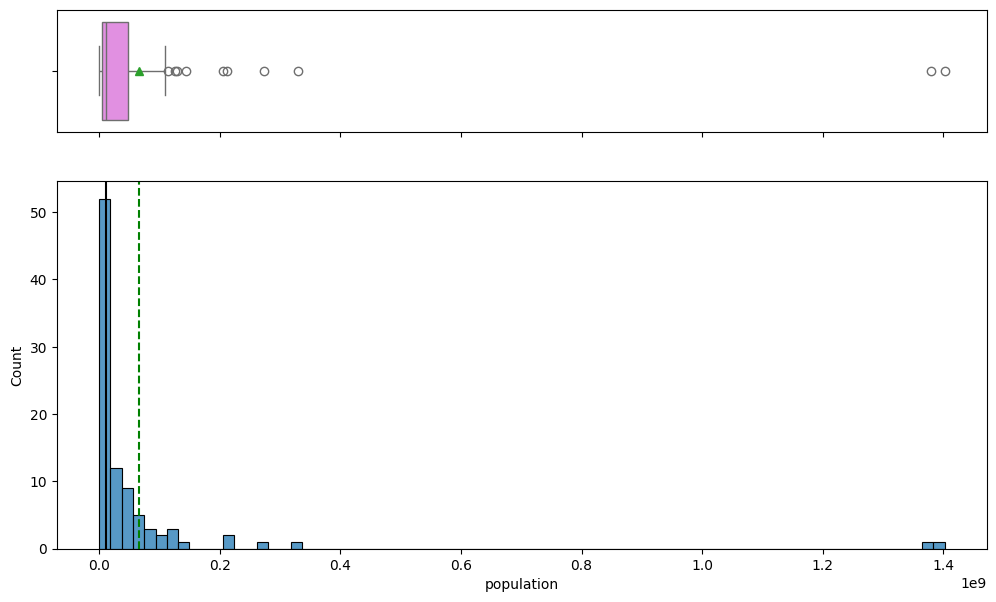

In [ ]:
histogram_boxplot(df,'population')
skewness_value = df['population'].skew()

print("Skewness of 'population':", skewness_value)

###GDP

Skewness of 'gdp': 6.098091642049003


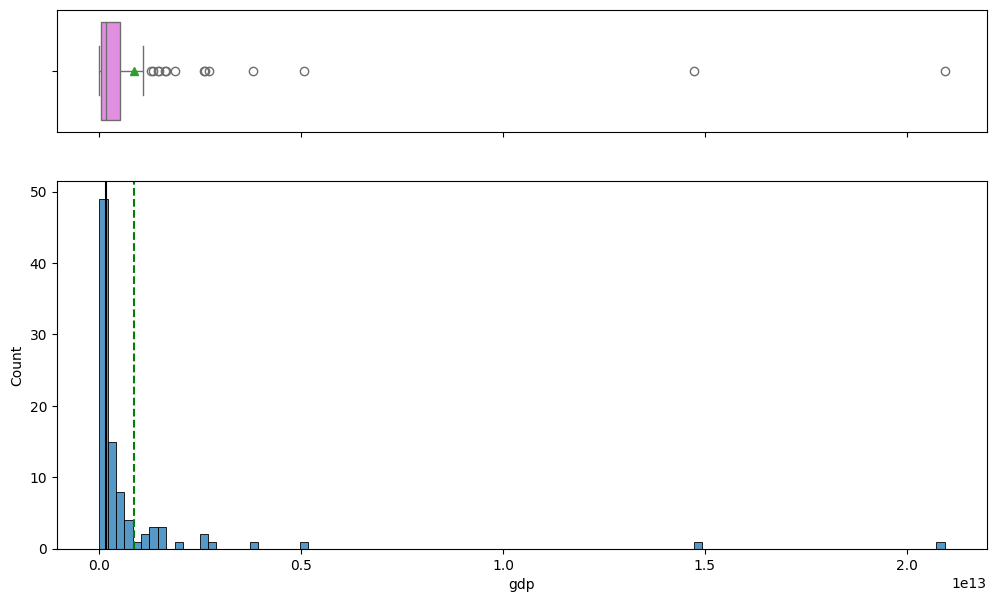

In [ ]:
histogram_boxplot(df,'gdp')
skewness_value = df['gdp'].skew()

print("Skewness of 'gdp':", skewness_value)

###Olympics_index

Skewness of 'olympics_index': 3.070487322731636


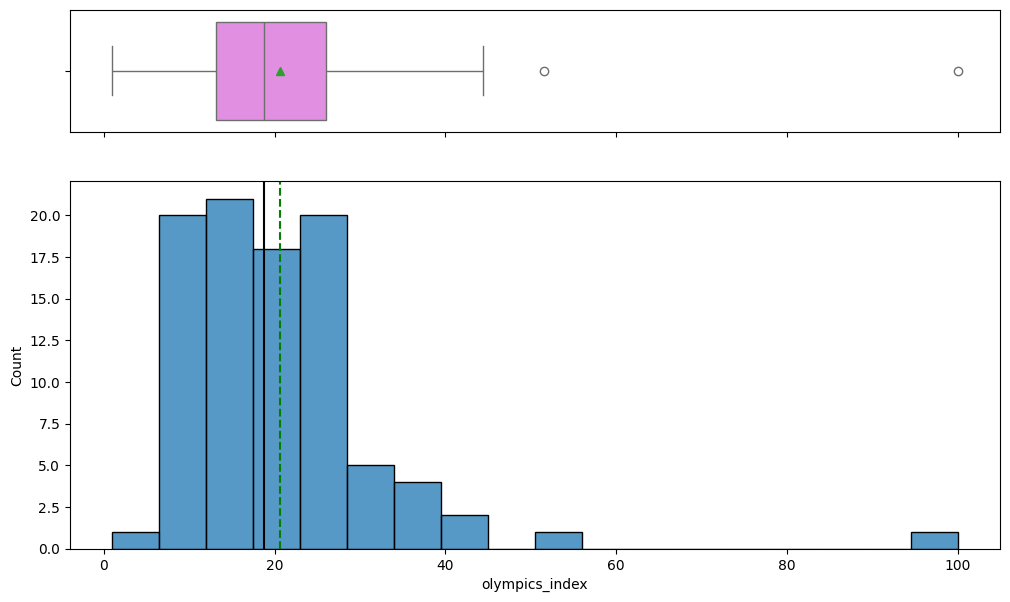

In [ ]:
histogram_boxplot(df,'olympics_index')
skewness_value = df['olympics_index'].skew()

print("Skewness of 'olympics_index':", skewness_value)

### Sports_index

Skewness of 'sports_index': 3.2219627952377023


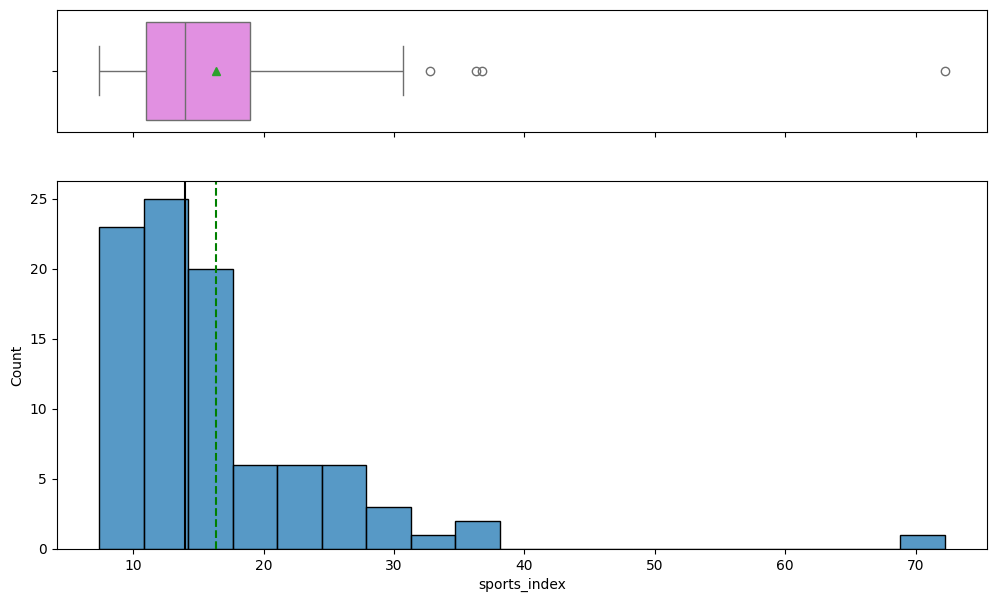

In [ ]:
histogram_boxplot(df,'sports_index')
skewness_value = df['sports_index'].skew()

print("Skewness of 'sports_index':", skewness_value)

###OlympicsIndex

Skewness of 'olympicsIndex': 2.8340134842986653


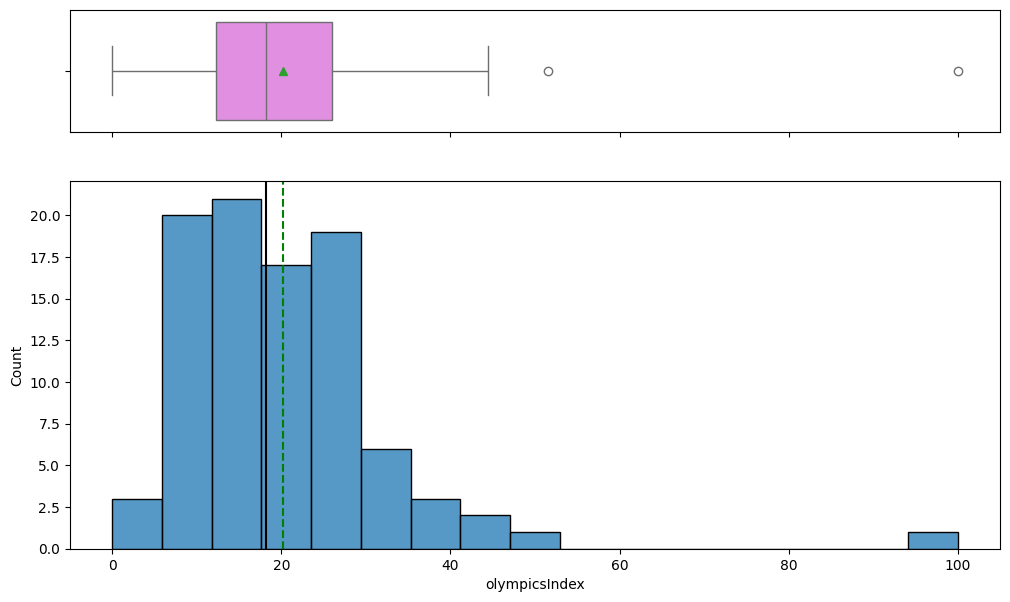

In [ ]:
histogram_boxplot(df,'olympicsIndex')
skewness_value = df['olympicsIndex'].skew()

print("Skewness of 'olympicsIndex':", skewness_value)

###SportIndex

Skewness of 'sportsIndex': 2.891664460333671


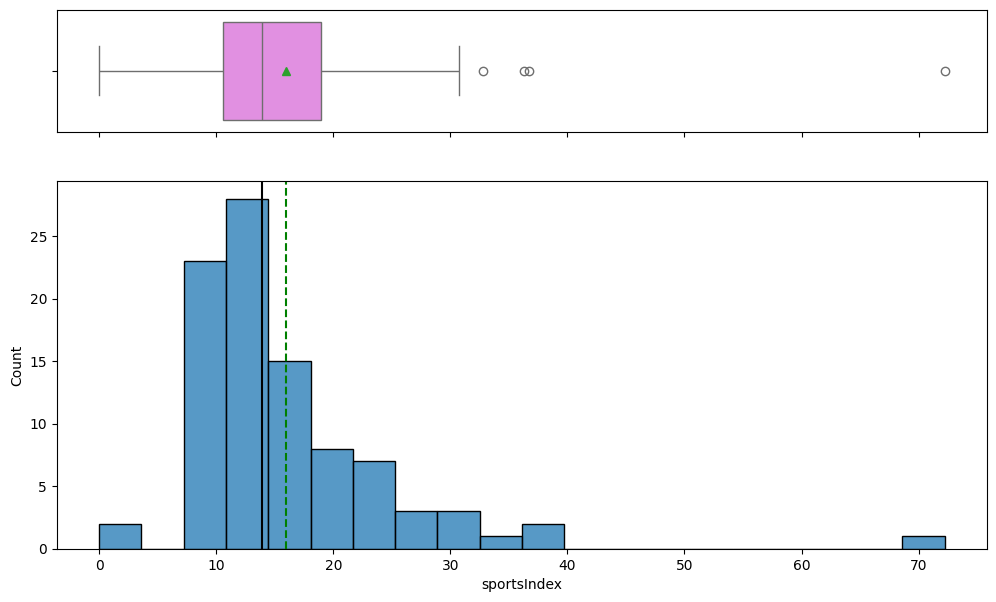

In [ ]:
histogram_boxplot(df,'sportsIndex')
skewness_value = df['sportsIndex'].skew()

print("Skewness of 'sportsIndex':", skewness_value)

###Total

Skewness of 'total': 3.2186253271435503


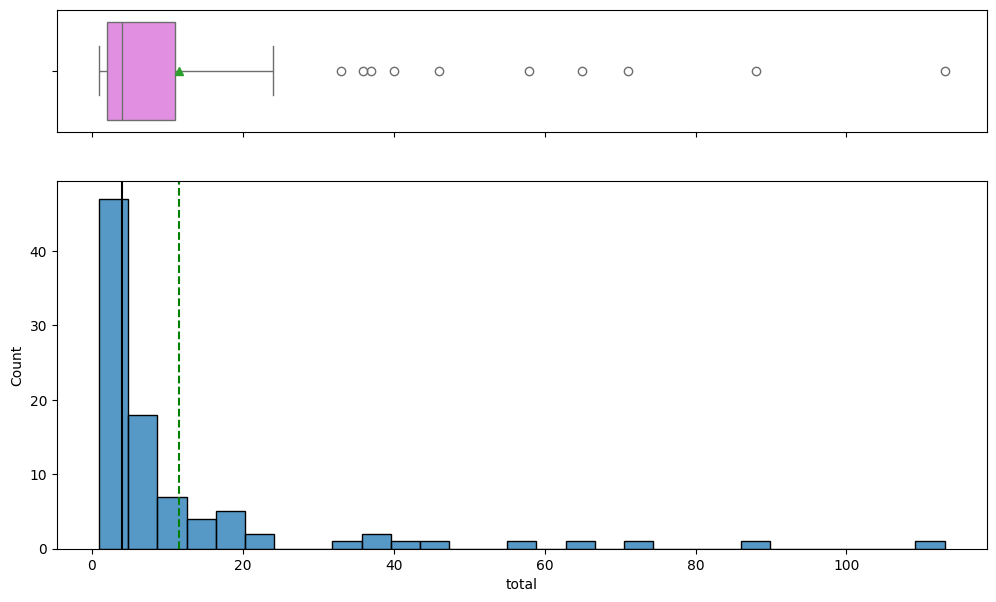

In [ ]:
histogram_boxplot(df,'total')
skewness_value = df['total'].skew()

print("Skewness of 'total':", skewness_value)

###Gold

Skewness of 'gold': 3.5175199650207833


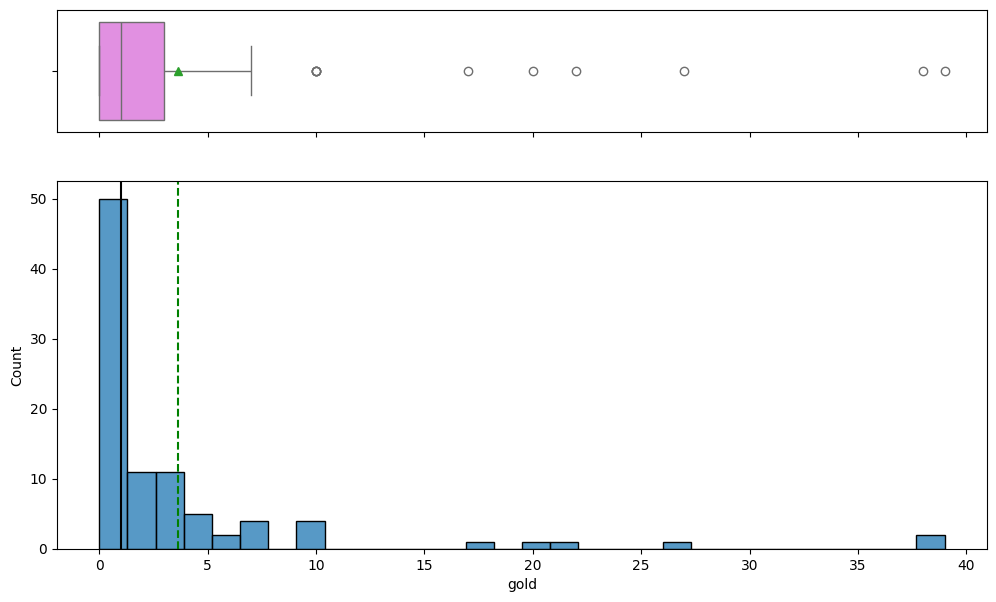

In [ ]:
histogram_boxplot(df,'gold')
skewness_value = df['gold'].skew()

print("Skewness of 'gold':", skewness_value)

### Silver

Skewness of 'silver': 3.6727000512209482


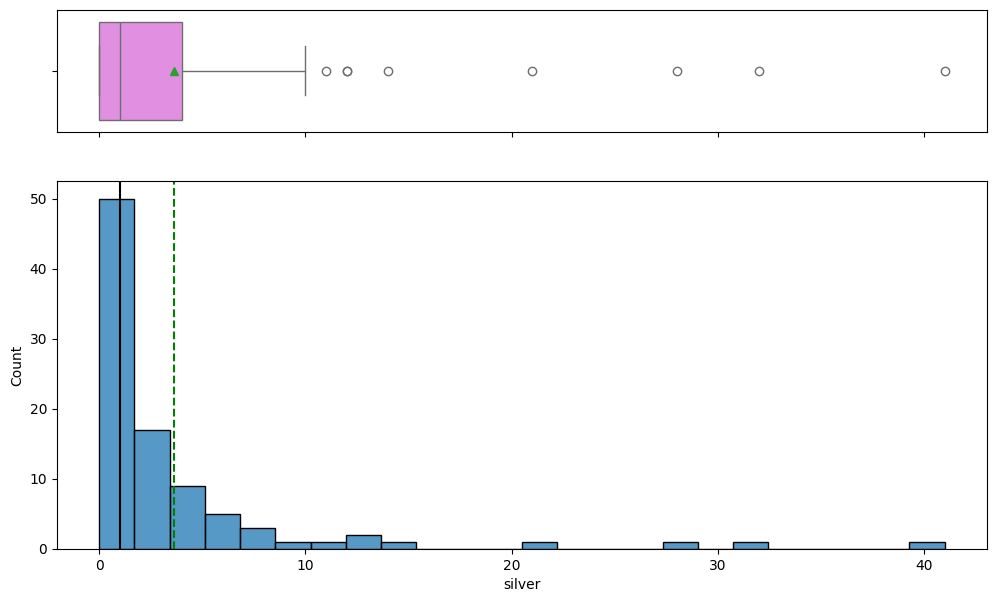

In [ ]:
histogram_boxplot(df,'silver')
skewness_value = df['silver'].skew()

print("Skewness of 'silver':", skewness_value)

###Bronze

Skewness of 'bronze': 2.371107738322299


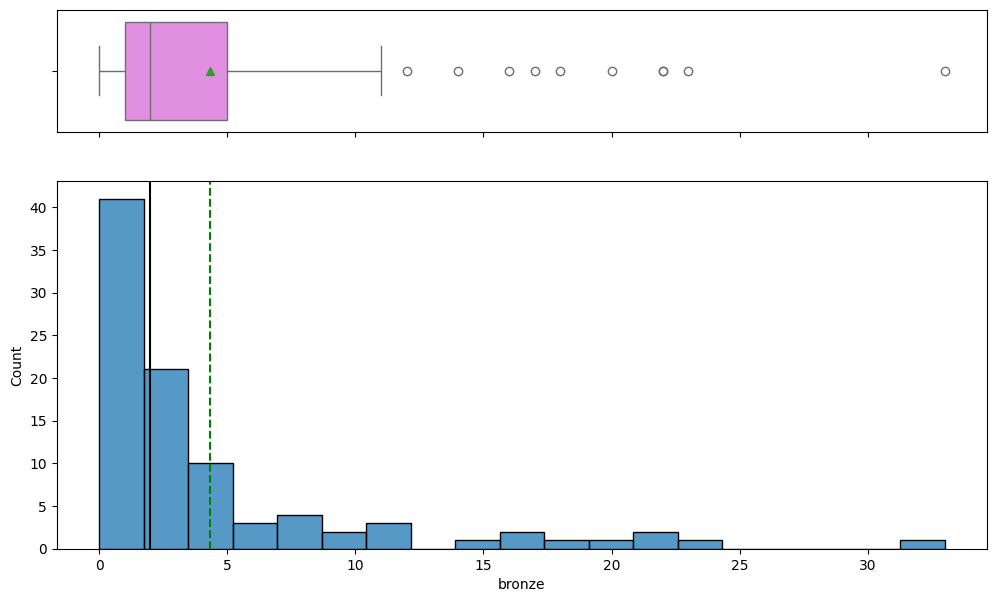

In [ ]:
histogram_boxplot(df,'bronze')
skewness_value = df['bronze'].skew()

print("Skewness of 'bronze':", skewness_value)

###Continent

<ipython-input-138-655c86677b22>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="Paired", order=order, ax=ax)  # Plot


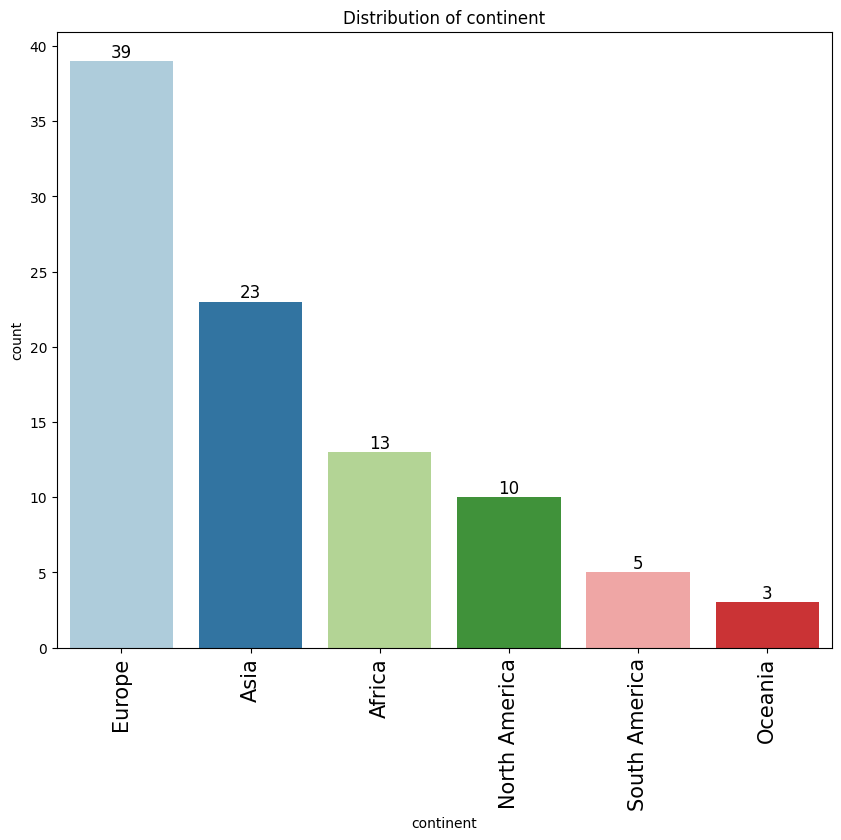

In [ ]:
labeled_barplot(df,'continent')

##Bivarite Analysis

###Heatmap

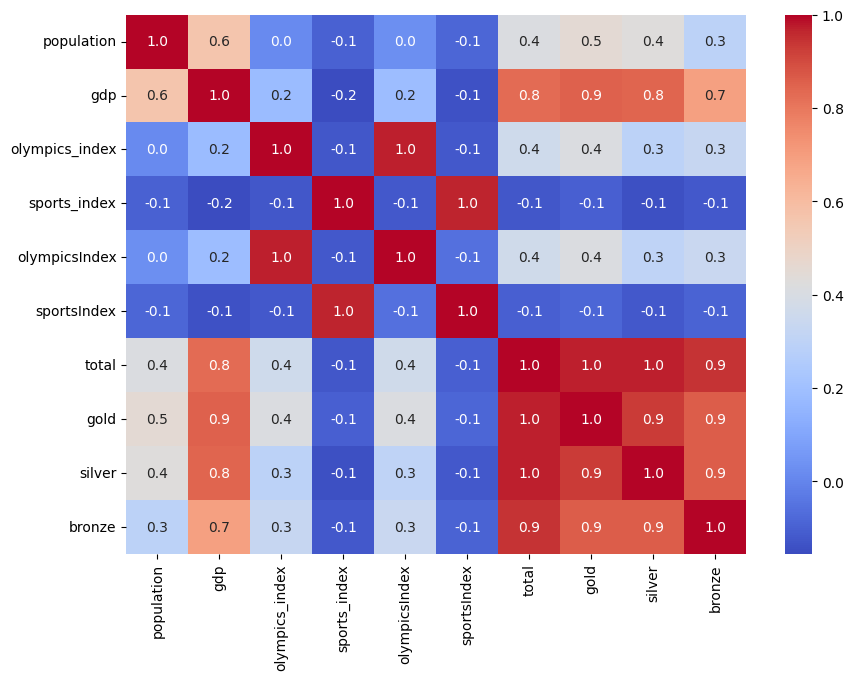

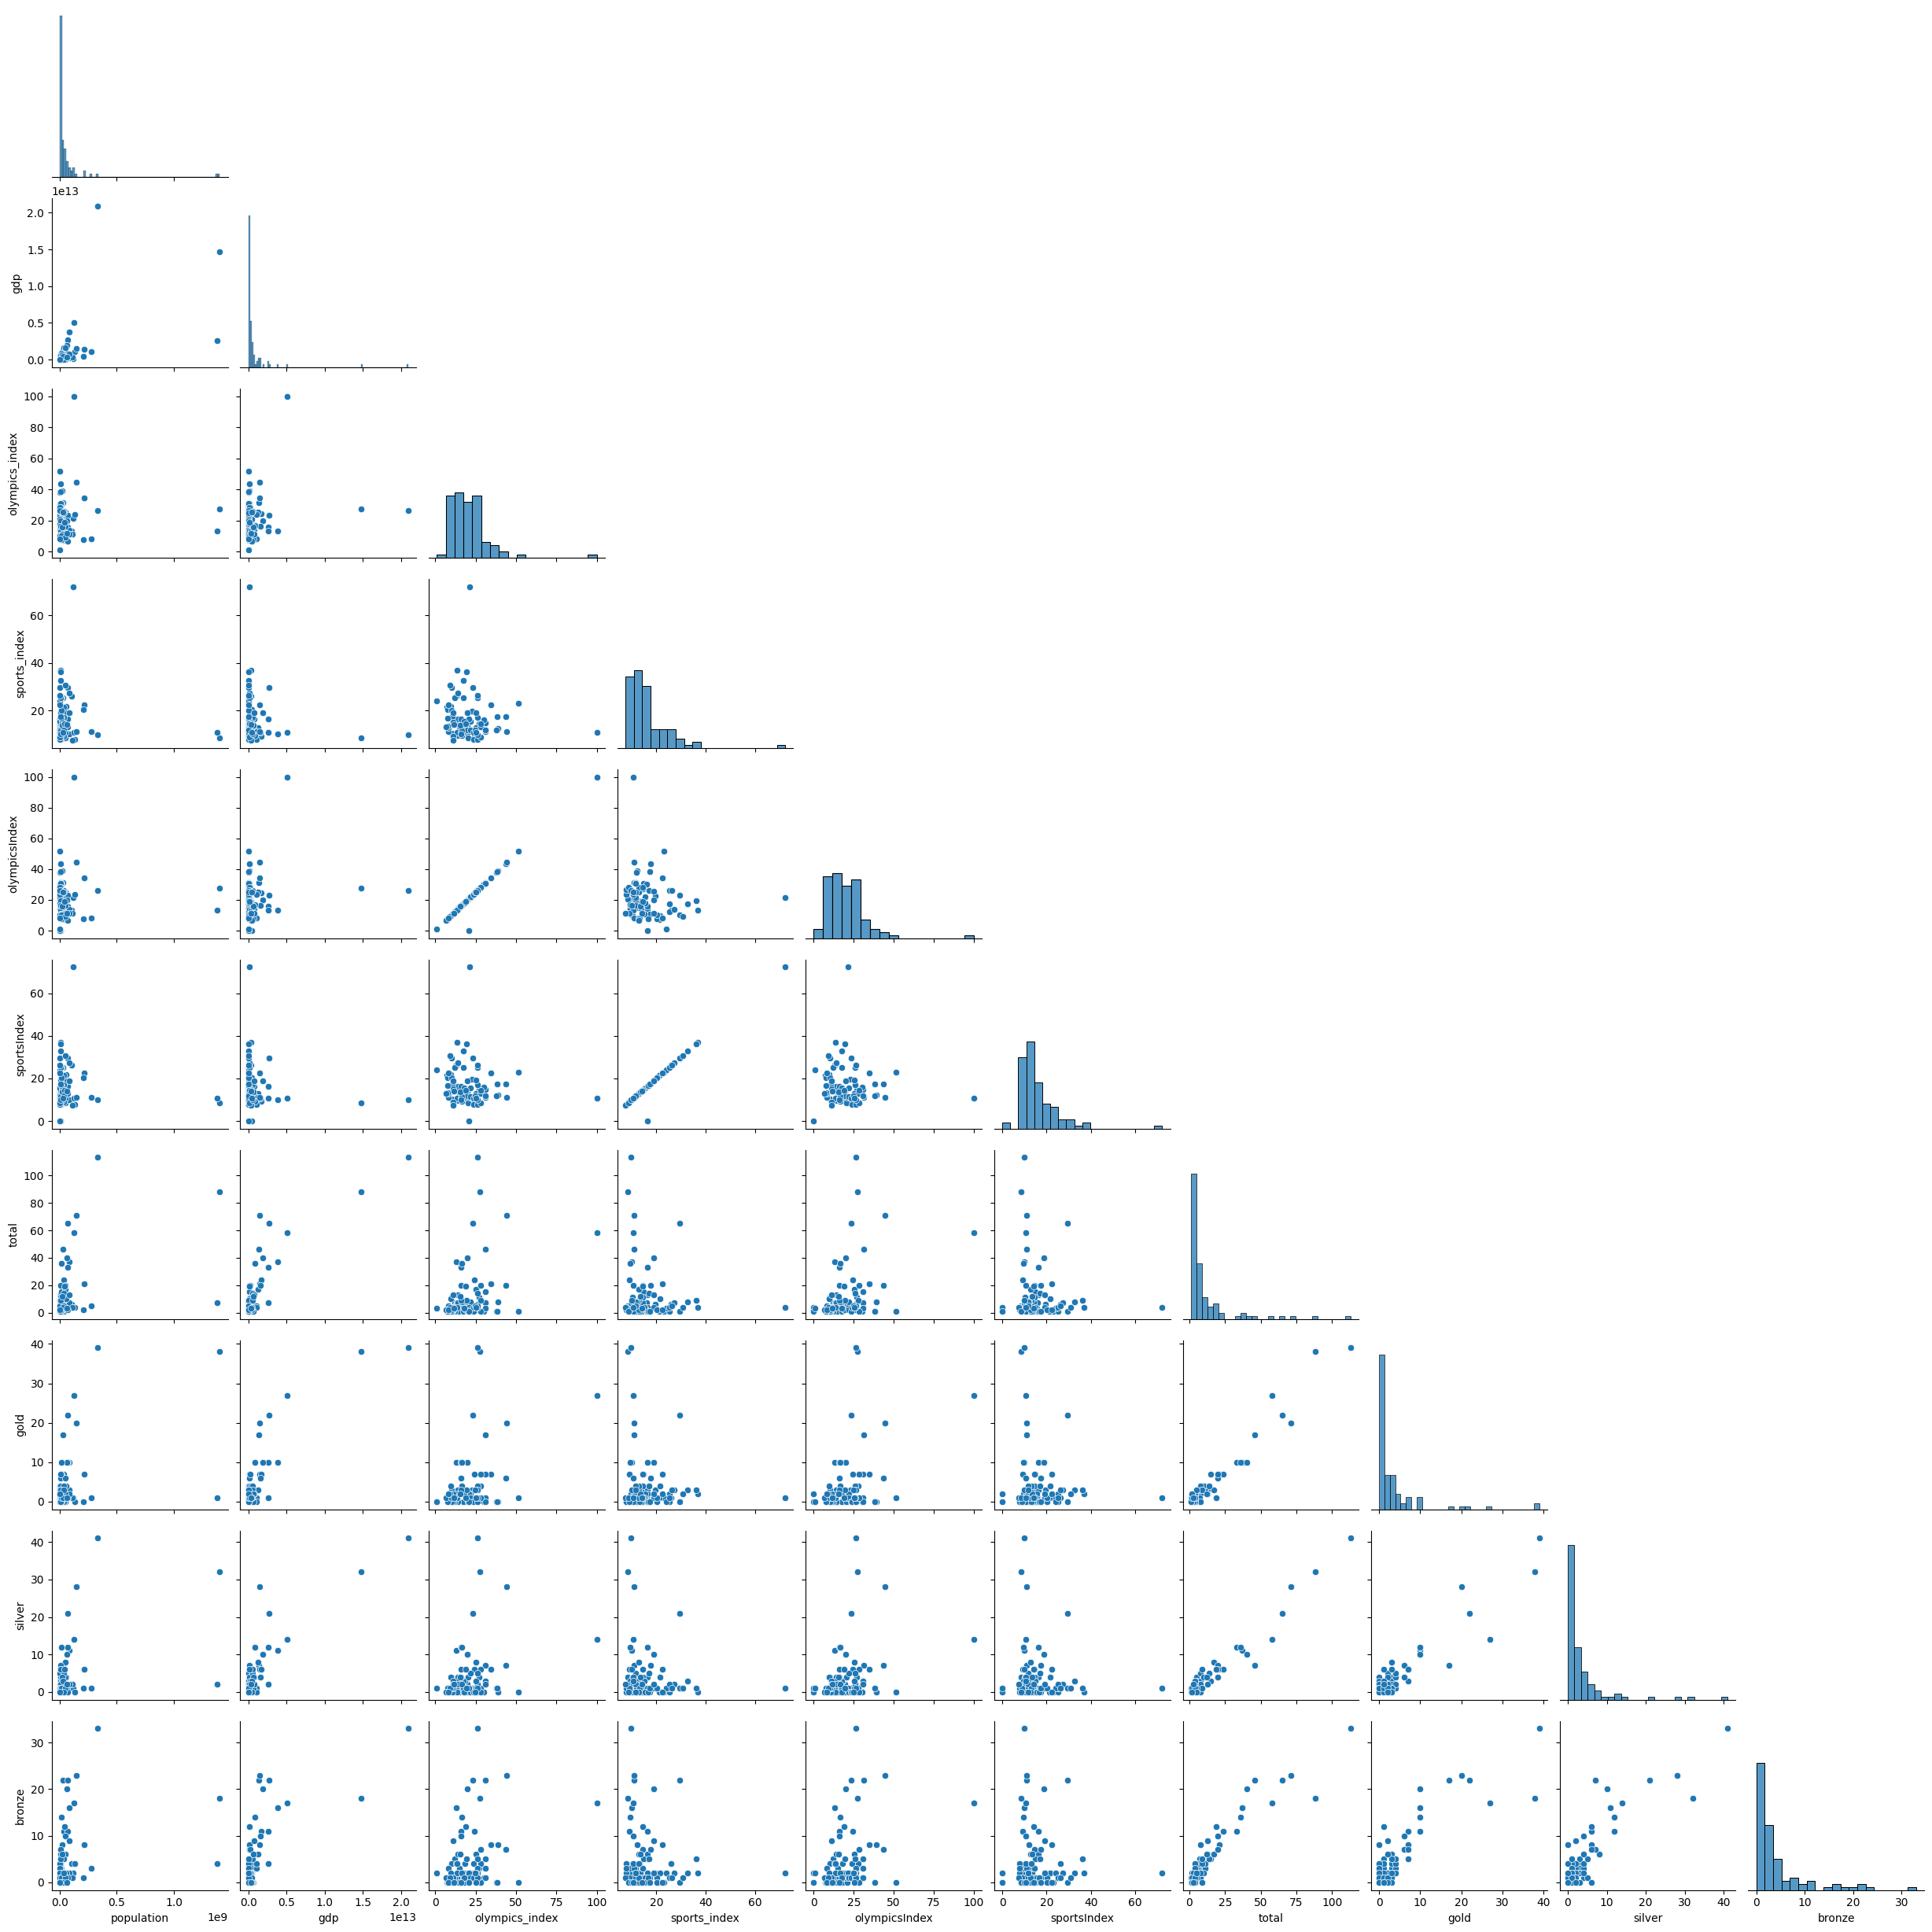

In [ ]:
# Check for correlation among numerical variables
num_var = ['population', 'gdp', 'olympics_index', 'sports_index','olympicsIndex','sportsIndex','total','gold','silver','bronze']
corr = df[num_var].corr()

# Plot the heatmap
plt.figure(figsize = (10, 7))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
            fmt = ".1f",
            xticklabels = corr.columns,
            yticklabels = corr.columns);

sns.pairplot(df[['population', 'gdp', 'olympics_index', 'sports_index','olympicsIndex','sportsIndex','total','gold','silver','bronze']], corner=True);

GDP: Correlation: 0.8
Indicates a strong positive relationship. Countries with higher GDP tend to win more medals, likely due to better funding for sports and infrastructure.

Gold: Correlation: 1.0
Perfect correlation, as gold is a direct component of total. This is expected.

Silver: Correlation: 0.9
Strong positive correlation, similar to gold, as it contributes directly to total

Bronze: Correlation: 0.9
Also strongly correlated, for the same reason as gold and silver.

Population: Correlation: 0.4
Moderate positive correlation. Larger populations may provide a larger talent pool, but the relationship is not as strong as GDP.

Olympics Index: Correlation: 0.4
Moderate positive correlation, suggesting historical performance contributes to current success.

#Data Spliting and Feature Engineering

##Scaling the Data

In [ ]:
scaler = StandardScaler()
# Select numerical columns
numerical_columns = ['population', 'gdp', 'olympics_index', 'sports_index',
                     'olympicsIndex', 'sportsIndex', 'total', 'gold', 'silver', 'bronze']

# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform the data
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the transformed data
print(df.head())

       continent  population       gdp  olympics_index  sports_index  \
0  South America   -0.102696 -0.179988       -0.086938     -0.797111   
1           Asia   -0.309957 -0.317802       -0.080152     -0.322264   
2        Oceania   -0.198914  0.172653        0.844419     -0.598047   
3         Europe   -0.280862 -0.162911       -0.681260     -0.046227   
4         Europe   -0.275033 -0.306655       -0.198262     -0.367097   

   olympicsIndex  sportsIndex     total      gold    silver    bronze  
0      -0.049723    -0.731056 -0.453587 -0.523424 -0.399721 -0.376011  
1      -0.043127    -0.272573 -0.400924 -0.523424 -0.247990 -0.376011  
2       0.855629    -0.538852  1.810952  1.910497  0.510664  2.861863  
3      -0.627452    -0.006050 -0.242933 -0.380252 -0.399721  0.109670  
4      -0.157939    -0.315862 -0.242933 -0.523424 -0.096259 -0.052224  


##Dummy variables

In [ ]:
# Step 2: Identify categorical columns (e.g., 'continent')
categorical_columns = ['continent']  # Add other categorical columns if applicable

# Step 3: Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Convert boolean columns to integers (if applicable)
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})

# Check the transformed dataset
print(df.head())

   population       gdp  olympics_index  sports_index  olympicsIndex  \
0   -0.102696 -0.179988       -0.086938     -0.797111      -0.049723   
1   -0.309957 -0.317802       -0.080152     -0.322264      -0.043127   
2   -0.198914  0.172653        0.844419     -0.598047       0.855629   
3   -0.280862 -0.162911       -0.681260     -0.046227      -0.627452   
4   -0.275033 -0.306655       -0.198262     -0.367097      -0.157939   

   sportsIndex     total      gold    silver    bronze  continent_Asia  \
0    -0.731056 -0.453587 -0.523424 -0.399721 -0.376011               0   
1    -0.272573 -0.400924 -0.523424 -0.247990 -0.376011               1   
2    -0.538852  1.810952  1.910497  0.510664  2.861863               0   
3    -0.006050 -0.242933 -0.380252 -0.399721  0.109670               0   
4    -0.315862 -0.242933 -0.523424 -0.096259 -0.052224               0   

   continent_Europe  continent_North America  continent_Oceania  \
0                 0                        0           

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   population               93 non-null     float64
 1   gdp                      93 non-null     float64
 2   olympics_index           93 non-null     float64
 3   sports_index             93 non-null     float64
 4   olympicsIndex            93 non-null     float64
 5   sportsIndex              93 non-null     float64
 6   total                    93 non-null     float64
 7   gold                     93 non-null     float64
 8   silver                   93 non-null     float64
 9   bronze                   93 non-null     float64
 10  continent_Asia           93 non-null     int64  
 11  continent_Europe         93 non-null     int64  
 12  continent_North America  93 non-null     int64  
 13  continent_Oceania        93 non-null     int64  
 14  continent_South America  93 

##Data Spliting

In [ ]:
#Feature Data
X = df.drop(columns=['total'])

#Target Data
y = df['total']

#Spliting into Training and Testing
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (74, 14)
X_test shape: (19, 14)
y_train shape: (74,)
y_test shape: (19,)


In [ ]:
X_train.head()

,population,gdp,olympics_index,sports_index,olympicsIndex,sportsIndex,gold,silver,bronze,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
65,-0.298150,-0.187822,-0.333856,-0.545110,-0.289748,-0.487739,0.049263,-0.247990,-0.376011,0,1,0,0,0
15,-0.282232,-0.044226,-0.521423,0.005215,-0.472077,0.043619,-0.093908,0.055471,0.271564,0,1,0,0,0
68,-0.138985,-0.101449,0.428009,0.077928,0.450846,0.113827,0.049263,0.207202,0.109670,0,1,0,0,0
78,-0.314175,-0.302833,0.450294,1.125612,0.472509,1.125404,-0.093908,-0.399721,-0.537905,0,1,0,0,0
30,-0.320057,-0.320879,-0.079237,-0.522291,-0.042238,-0.465707,-0.380252,-0.551452,-0.537905,0,0,0,1,0


#5. Machine Learning Models

##Linear Regression

In [ ]:
# Instantiate the model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)
# Predict on the test data
y_pred = linear_model.predict(X_test)

In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 4.890094177543041e-16
R-squared (R²): 1.0


## Decision Tree

In [ ]:
# Instantiate the model
tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Predict on the test data
y_pred = tree_model.predict(X_test)

In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.0942402965001351
R-squared (R²): 0.8328173374613003


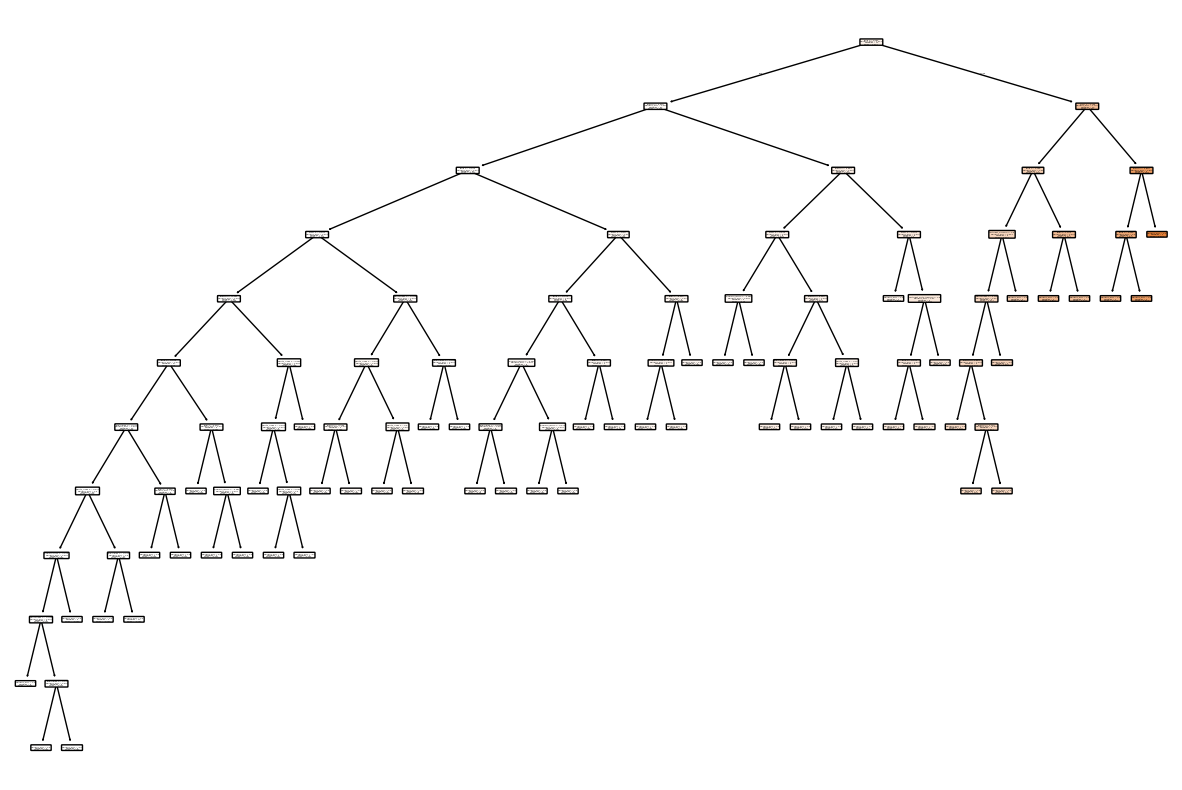

In [ ]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

##Random Forest

In [ ]:
# Instantiate the Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test data
y_pred = random_forest_model.predict(X_test)

In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.07400635048687075
R-squared (R²): 0.9048417956656347


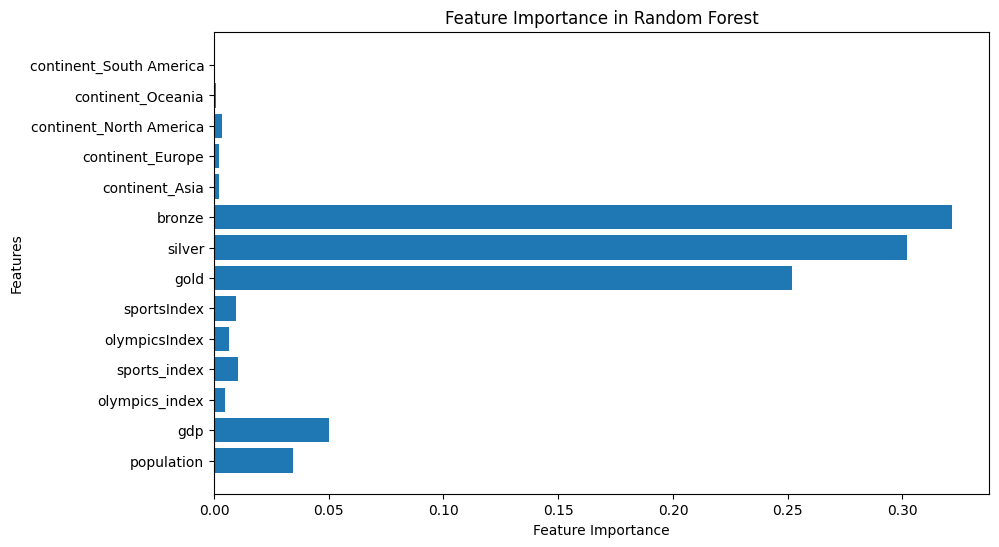

In [ ]:
feature_importances = random_forest_model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()

#6. Deep Learning Models

In [ ]:
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(32, activation='relu'),                                  # Hidden layer
    Dense(1)                                                       # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 1.3283 - mae: 0.8199 - val_loss: 0.6021 - val_mae: 0.6434
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.3938 - mae: 0.8024 - val_loss: 0.4879 - val_mae: 0.5663
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.0903 - mae: 0.6826 - val_loss: 0.3956 - val_mae: 0.5035
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7811 - mae: 0.5949 - val_loss: 0.3195 - val_mae: 0.4460
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.0432 - mae: 0.6436 - val_loss: 0.2528 - val_mae: 0.3886
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.7308 - mae: 0.5031 - val_loss: 0.1960 - val_mae: 0.3307
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7358 - mae: 0.4891 - val_loss: 0.1486 - val_mae: 0.2777
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3962 - mae: 0.3795 - val_loss: 0.1126 - val_mae: 0.2291
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2291 - mae: 0.2569 - 

In [ ]:
# Evaluate on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

Test Loss (MSE): 0.005252215079963207
Test MAE: 0.05733572691679001


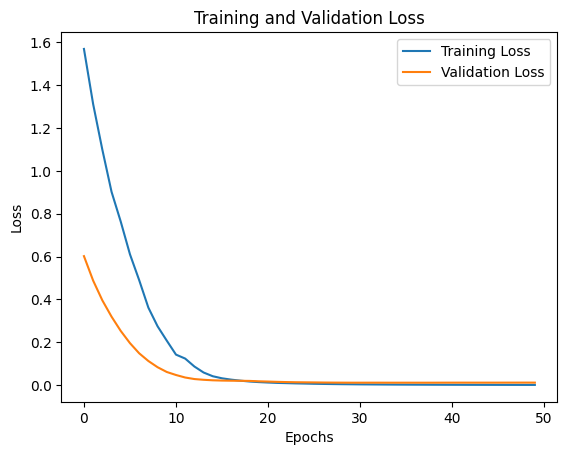

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

#7. Model Evaluation

In [ ]:
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {"MAE": mae, "MSE": mse, "R²": r2}

In [ ]:
# Linear Regression Evaluation
y_pred_lr = linear_model.predict(X_test)
metrics_lr = evaluate_model(y_test, y_pred_lr)
print("Linear Regression:", metrics_lr)

Linear Regression: {'MAE': 4.890094177543041e-16, 'MSE': 6.710167996896439e-31, 'R²': 1.0}


In [ ]:
# Decision Tree Evaluation
y_pred_dt = tree_model.predict(X_test)
metrics_dt = evaluate_model(y_test, y_pred_dt)
print("Decision Tree:", metrics_dt)

Decision Tree: {'MAE': 0.0942402965001351, 'MSE': 0.015764957707662012, 'R²': 0.8328173374613003}


In [ ]:
# Random Forest Evaluation
y_pred_rf = random_forest_model.predict(X_test)
metrics_rf = evaluate_model(y_test, y_pred_rf)
print("Random Forest:", metrics_rf)

Random Forest: {'MAE': 0.07400635048687075, 'MSE': 0.00897320956663834, 'R²': 0.9048417956656347}


In [ ]:
# Neural Network Evaluation
y_pred_nn = model.predict(X_test).flatten()  # Flatten for compatibility
metrics_nn = evaluate_model(y_test, y_pred_nn)
print("Neural Network:", metrics_nn)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Neural Network: {'MAE': 0.057335731207255256, 'MSE': 0.005252215627816912, 'R²': 0.944301823755668}


In [ ]:
# Collect results in a dictionary
results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "Neural Network"],
    "MAE": [metrics_lr["MAE"], metrics_dt["MAE"], metrics_rf["MAE"], metrics_nn["MAE"]],
    "MSE": [metrics_lr["MSE"], metrics_dt["MSE"], metrics_rf["MSE"], metrics_nn["MSE"]],
    "R²": [metrics_lr["R²"], metrics_dt["R²"], metrics_rf["R²"], metrics_nn["R²"]]
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(results)

# Display the table
print(comparison_df)

               Model           MAE           MSE        R²
0  Linear Regression  4.890094e-16  6.710168e-31  1.000000
1      Decision Tree  9.424030e-02  1.576496e-02  0.832817
2      Random Forest  7.400635e-02  8.973210e-03  0.904842
3     Neural Network  5.733573e-02  5.252216e-03  0.944302


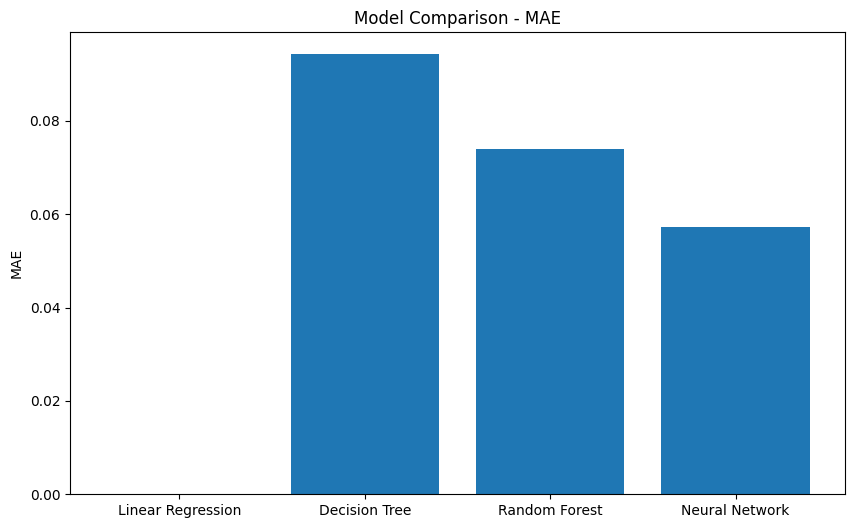

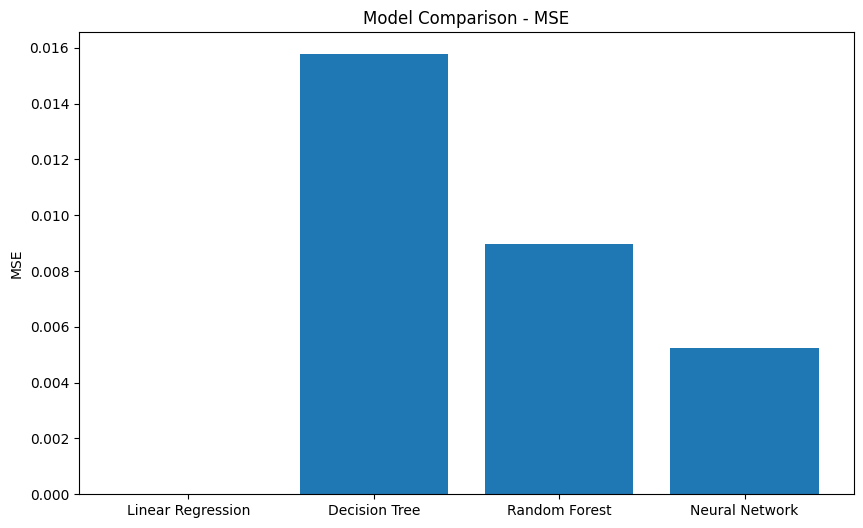

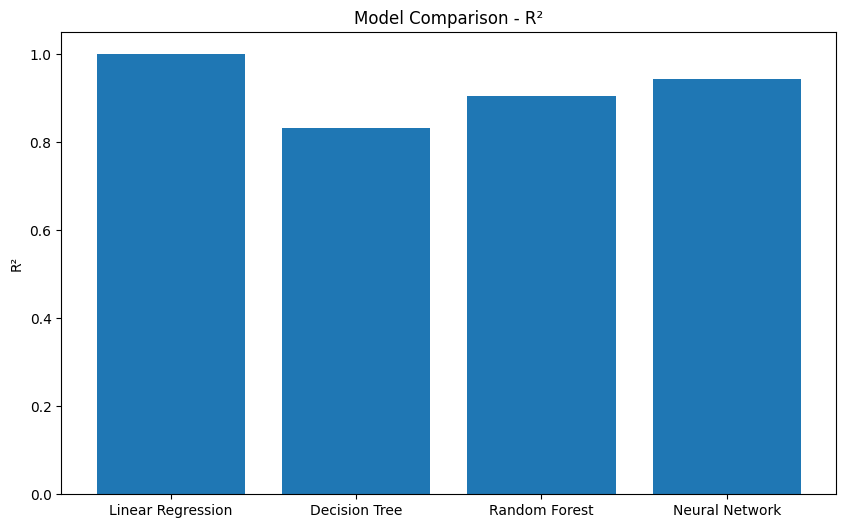

In [ ]:
# Bar plot for MAE
plt.figure(figsize=(10, 6))
plt.bar(comparison_df["Model"], comparison_df["MAE"])
plt.ylabel("MAE")
plt.title("Model Comparison - MAE")
plt.show()

# Bar plot for MSE
plt.figure(figsize=(10, 6))
plt.bar(comparison_df["Model"], comparison_df["MSE"])
plt.ylabel("MSE")
plt.title("Model Comparison - MSE")
plt.show()

# Bar plot for R²
plt.figure(figsize=(10, 6))
plt.bar(comparison_df["Model"], comparison_df["R²"])
plt.ylabel("R²")
plt.title("Model Comparison - R²")
plt.show()

# Interpretation and Insights

## Feature Importance

From the Random Forest model, the relative importance of features in predicting the total number of medals was analyzed. The most influential features were:

*  Gold, Silver, and Bronze Medals: These variables directly contribute to the total medals, which explains their dominant role in the model.

*  GDP: Exhibited a strong positive correlation with total medals, indicating that wealthier countries tend to perform better in the Olympics due to better sports funding and infrastructure.

*  Population: Showed a moderate positive influence, suggesting that larger populations provide a bigger talent pool but aren't as critical as GDP.

*  Olympics and Sports Indices: These variables captured historical and current sports performance, moderately contributing to the model’s predictions.

##Model Interpretation

Several machine learning models were evaluated to predict the total number of medals:

**Linear Regression:**

Performance: Achieved an R² of 1.0 with a negligible MAE.

Interpretation: While this appears perfect, the result is skewed due to the direct inclusion of gold, silver, and bronze medals as features. This model essentially "learned" to sum these values rather than identifying patterns in other variables.

**Decision Tree Regression:**

Performance: R² of 0.83 and MAE of 0.094.

Insights: Captured non-linear relationships between features and the target. However, it tended to overfit the data due to the small dataset.

**Random Forest Regression:**

Performance: R² of 0.90 and MAE of 0.074.

Insights: Provided a balance between accuracy and generalization. By aggregating multiple decision trees, it reduced overfitting and highlighted the relative importance of features.

**Neural Network:**

Performance: R² of 0.94 and MAE of 0.057.

Insights: Outperformed other models slightly, capturing complex patterns in the data. However, it requires more computational resources and is less interpretable.


##Key Findings


*  Including gold, silver, and bronze medals significantly boosted model accuracy but introduced redundancy. In real-world scenarios, excluding these variables might make the model more applicable for prediction.

*  GDP and sports indices emerged as key predictors, aligning with the idea that economic strength and sports infrastructure strongly influence Olympic success.

*  Neural networks performed best among the tested models but are less transparent than decision trees or Random Forest.